In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
from matplotlib import colors
from matplotlib.colors import ListedColormap
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [3]:
df = pd.read_csv('bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
df["conversion"] = df['Target'].apply(lambda x: 0 if x == 'no' else 1)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [8]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target',
 'conversion']

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion')['Target'].count()/df.shape[0] *100)

In [11]:
conversion_rate_df.T

conversion,0,1
Target,88.30,11.70


In [12]:
conversion_rate_by_job = pd.DataFrame(
df.groupby('job')['conversion'].sum()/df.groupby('job')['conversion'].count() *100)

In [13]:
conversion_rate_by_job

,conversion
job,
admin.,12.20
blue-collar,7.27
entrepreneur,8.27
housemaid,8.79
management,13.76
retired,22.79
self-employed,11.84
services,8.88
student,28.68


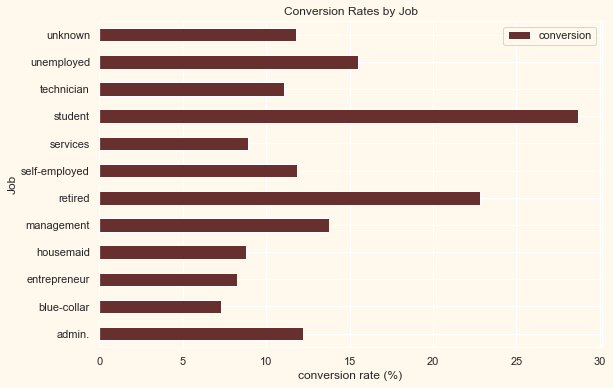

In [14]:
ax = conversion_rate_by_job.plot( 
    kind='barh',
    color='#682F2F',
    grid=True,
    figsize=(9, 6),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

In [15]:
conversion_rate_by_marital = pd.DataFrame(
df.groupby('marital')['conversion'].sum()/df.groupby('marital')['conversion'].count() *100)

In [16]:
conversion_rate_by_marital

,conversion
marital,
divorced,11.95
married,10.12
single,14.95


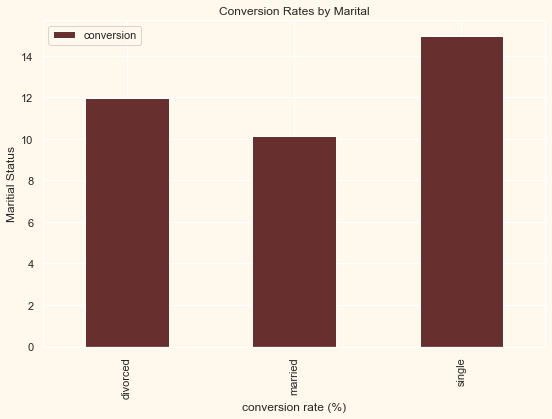

In [17]:
ax = conversion_rate_by_marital.plot( 
    kind = 'bar',
    color='#682F2F',
    grid=True,
    figsize=(9, 6),
    title='Conversion Rates by Marital'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Maritial Status')

plt.show()

In [18]:
conversion_rate_by_education = pd.DataFrame(
df.groupby('education')['conversion'].sum()/df.groupby('education')['conversion'].count() *100)

In [19]:
conversion_rate_by_education

,conversion
education,
primary,8.63
secondary,10.56
tertiary,15.01
unknown,13.57


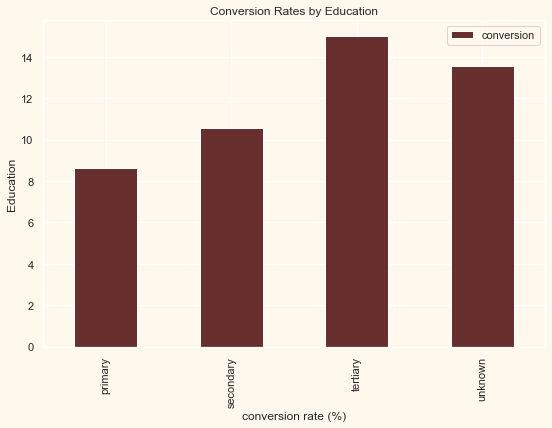

In [20]:
ax = conversion_rate_by_education.plot( 
    kind = 'bar',
    color='#682F2F',
    grid=True,
    figsize=(9, 6),
    title='Conversion Rates by Education'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Education')

plt.show()

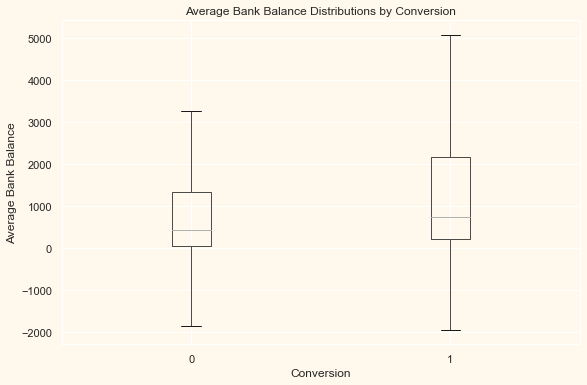

In [21]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(9, 6)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

In [22]:
conversion_by_campaign = pd.DataFrame(
df.groupby('campaign')['conversion'].sum()/df.groupby('campaign')['conversion'].count() *100)

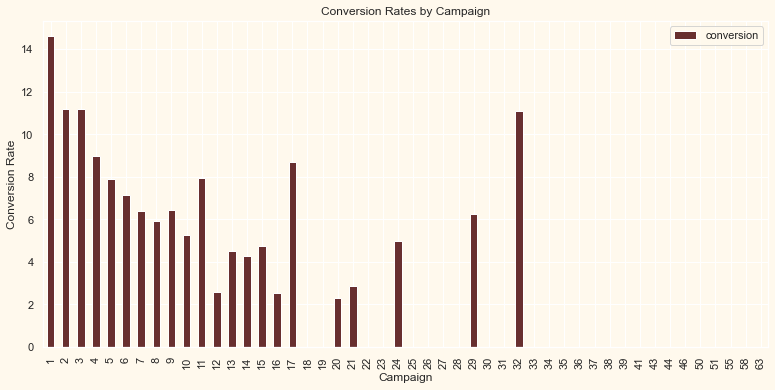

In [23]:
ax = conversion_by_campaign.plot( 
    kind = 'bar',
    color='#682F2F',
    grid=True,
    figsize=(13, 6),
    title='Conversion Rates by Campaign'
)

ax.set_xlabel('Campaign')
ax.set_ylabel('Conversion Rate')

plt.show()

### Conversion By Month

In [24]:
df['month'] = pd.to_datetime(df.month, format='%b').dt.month

In [25]:
conversion_by_month = pd.DataFrame(
df.groupby('month')['conversion'].sum()/df.groupby('month')['conversion'].count() *100)

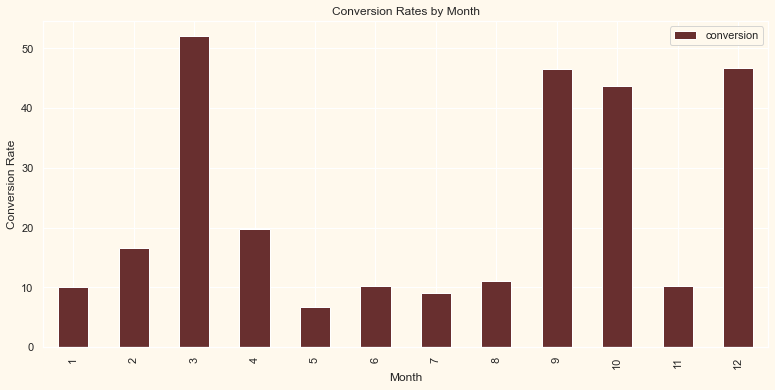

In [26]:
ax = conversion_by_month.plot( 
    kind = 'bar',
    color='#682F2F',
    grid=True,
    figsize=(13, 6),
    title='Conversion Rates by Month'
)

ax.set_xlabel('Month')
ax.set_ylabel('Conversion Rate')

plt.show()

### Encoding Variables

In [27]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target',
 'conversion']

#### Encoding Jobs

In [28]:
job_encoded = pd.get_dummies(df['job'],prefix = 'job')

In [29]:
job_encoded

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
df = pd.concat([df, job_encoded], axis = 1)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


#### Encoding Marital

In [32]:
marital_encoded = pd.get_dummies(df['marital'],prefix = 'marital')

In [33]:
marital_encoded.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [34]:
df = pd.concat([df, marital_encoded], axis = 1)

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


#### Encoding Education

In [36]:
education_encoded = pd.get_dummies(df['education'], prefix='education')

In [37]:
df = pd.concat([df, education_encoded], axis = 1)

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,0,1,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,1,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1


#### Encoding Housing

In [39]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

#### Encoding Loan

In [40]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

#### Encoding Contact

In [41]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [42]:
contact_encoded = pd.get_dummies(df['contact'],prefix = 'contact')

In [43]:
df = pd.concat([df, contact_encoded], axis = 1)

### All Features

In [44]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target',
 'conversion',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown']

In [45]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
    'loan'
] + list(marital_encoded.columns) + list(education_encoded.columns) + list(contact_encoded.columns) + list(job_encoded.columns)

In [46]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'loan',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown']

In [47]:
target = 'conversion'

In [48]:
from sklearn import tree

In [49]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)


In [50]:
dt_model.fit(df[features], df[target])

DecisionTreeClassifier(max_depth=4)

In [51]:
dt_model.classes_

array([0, 1])

In [52]:
import graphviz

In [53]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 

In [54]:
graph = graphviz.Source(dot_data)

In [55]:
from IPython.core.display import display, HTML
display(HTML(""))



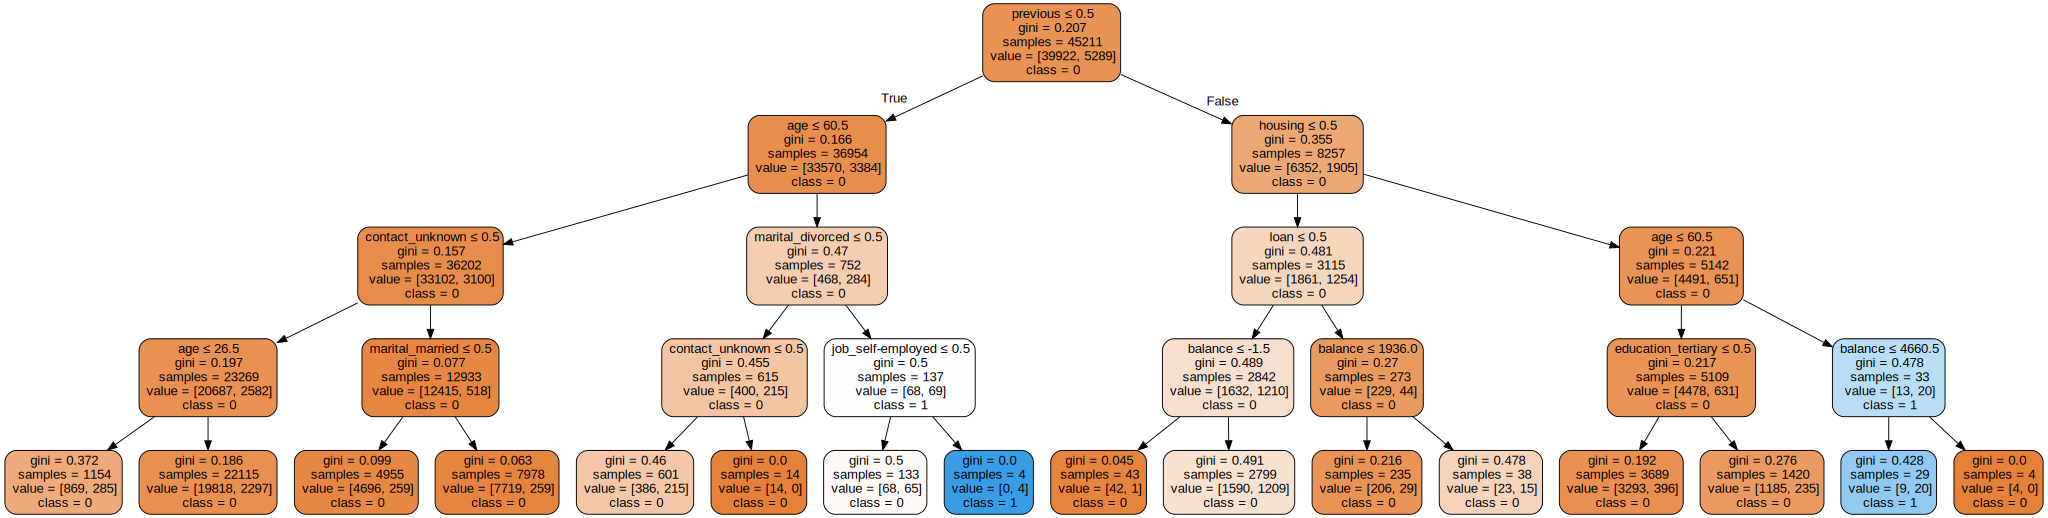

In [56]:
graph